# Excersise 03

In [13]:
# imports
import numpy as np
import pandas as pd
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [9]:
# configs
plt.rcParams['figure.figsize'] = [10, 5]

## Instructions for the 3rd seminar
In the dataset Countries, there are data of employment in particular sectors in
1979. Analyze associations in employment between particular sectors (variables) using
PCA.   
Assess how the particular countries (objects) are different in terms of economical
structure. In the beginning, standardize the data.   
Work with all variables (There are 8
variables. Vector of these variables shall be further signed as X.)

# 1 EDA and data transformations

## 1.1 Summary statistics and plots

In [137]:
countries_data = pd.read_csv("../Data/countries.csv")
countries_data.columns = countries_data.columns.str.replace(".", "_")  # I replace the R-way . name of variable with _ character

countries_data


C:\Users\A20008~1\AppData\Local\Temp/ipykernel_15116/3565305813.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  countries_data.columns = countries_data.columns.str.replace(".", "_")  # I replace the R-way . name of variable with _ character


,Agricul,Mining,Manufact_indust,Energ,Build_ind,Services,Finance,Soc_services
0,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6
1,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2
2,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6
3,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3
4,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8
5,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1
6,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2
7,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5
8,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3
9,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8


In [132]:
countries_data.describe()

,Agricul,Mining,Manufact.indust,Energ,Build.ind,Services,Finance,Soc.services
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000


In [133]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Agricul          26 non-null     float64
 1   Mining           26 non-null     float64
 2   Manufact.indust  26 non-null     float64
 3   Energ            26 non-null     float64
 4   Build.ind        26 non-null     float64
 5   Services         26 non-null     float64
 6   Finance          26 non-null     float64
 7   Soc.services     26 non-null     float64
dtypes: float64(8)
memory usage: 1.8 KB


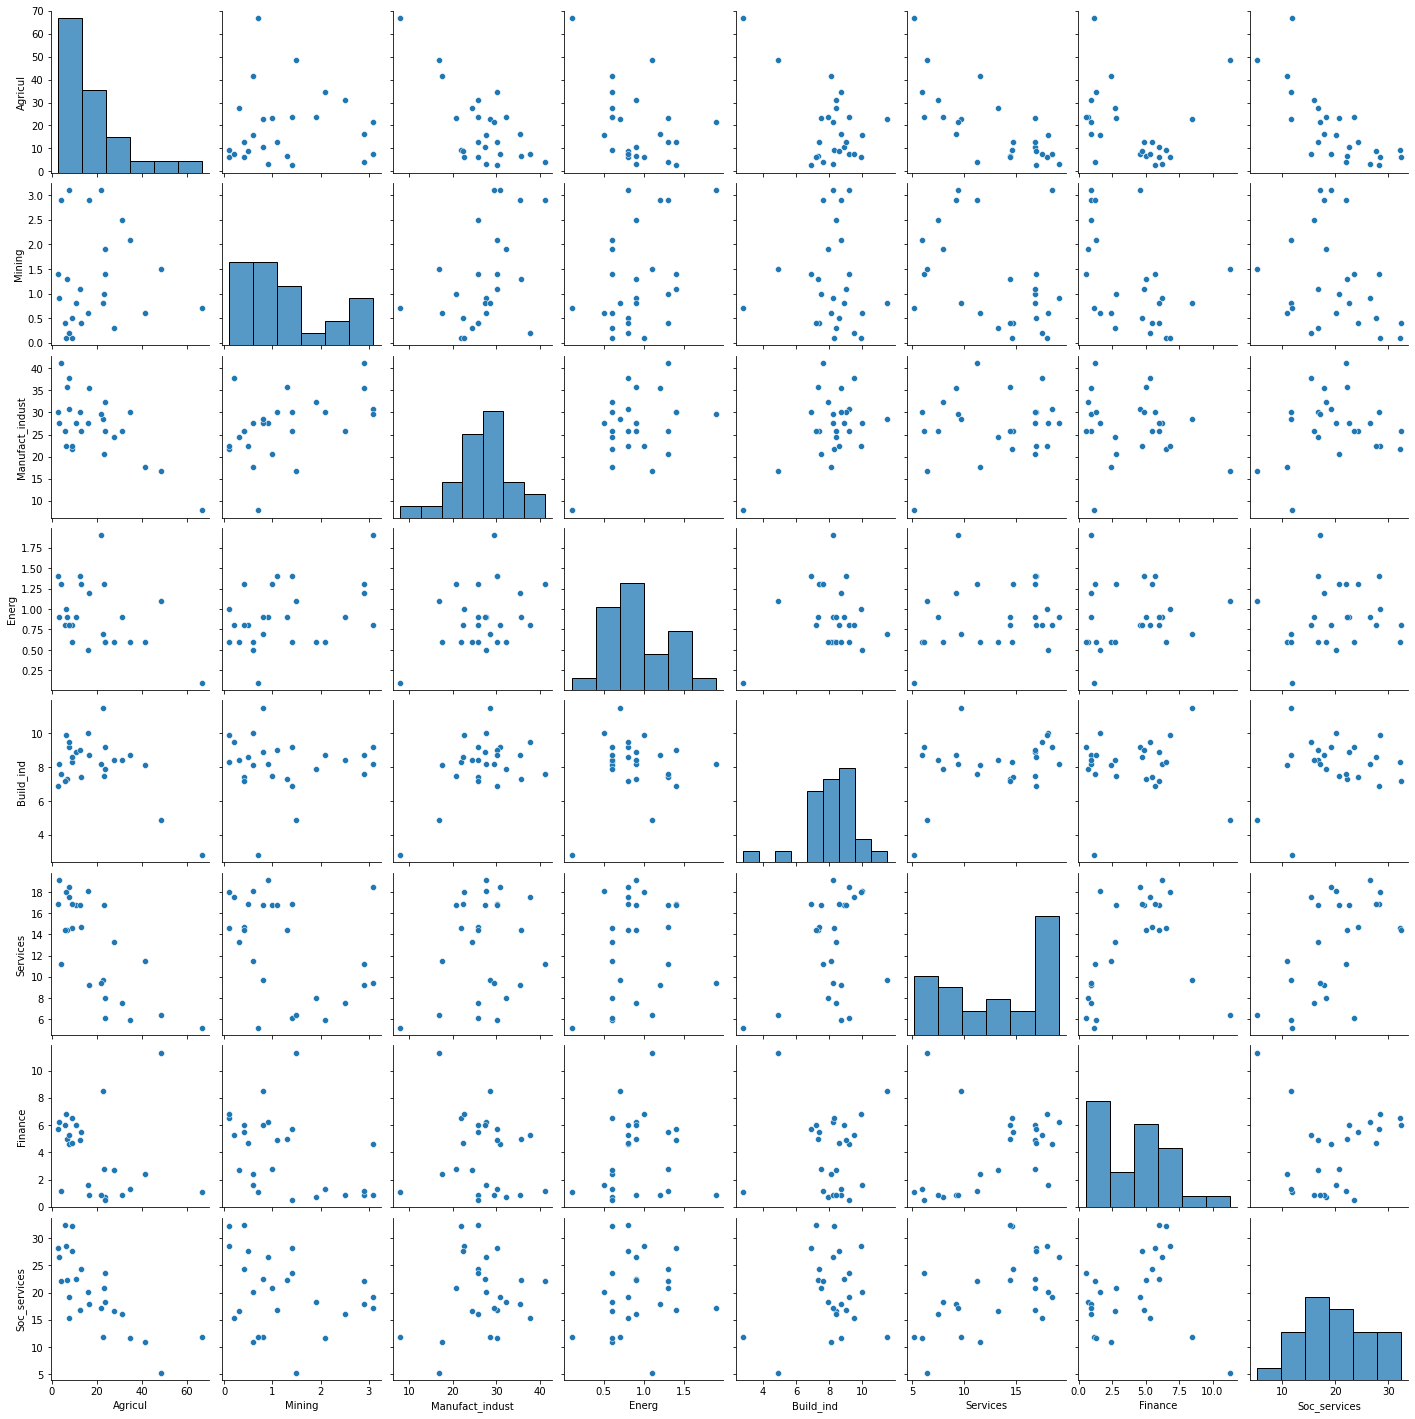

In [138]:
sns.pairplot(countries_data)

<AxesSubplot:>

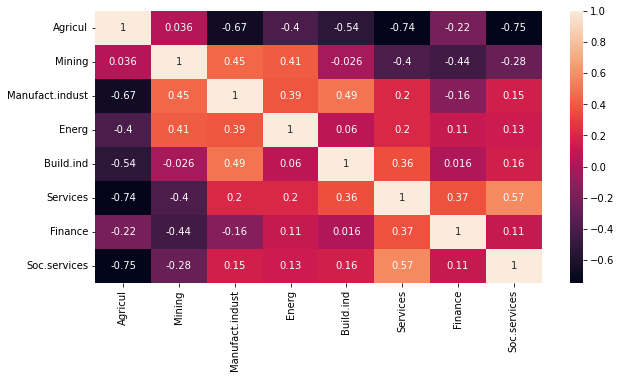

In [11]:
sns.heatmap(countries_data.corr(), annot=True)

## 1.2 Rescaling our variables

At first, we perform the standardization. To do so, I use the sklearn's **Standard Scaler** which uses basic Z-Score standardization

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_countries_data = pd.DataFrame(scaler.fit_transform(X=countries_data))
std_countries_data.columns = countries_data.columns.copy()
std_countries_data

,Agricul,Mining,Manufact_indust,Energ,Build_ind,Services,Finance,Soc_services
0,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082
1,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288
2,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792
3,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996
4,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012
5,-0.211928,-0.687386,0.086196,-1.105126,1.136949,1.146198,-0.872073,0.011486
6,-0.749821,1.940856,0.551875,-0.291920,0.641173,1.235356,0.218018,-0.122904
7,-0.841656,-1.213035,-0.655981,0.250217,1.074977,1.123908,1.017419,1.265795
8,-1.077805,0.153651,0.464560,1.334492,-0.784185,0.878723,0.617719,1.235930
9,-0.421837,-0.161738,0.464560,1.334492,0.517228,0.856434,0.327027,-0.481278


Not surprising - the correlation matrix of or rescaled data set is the very same

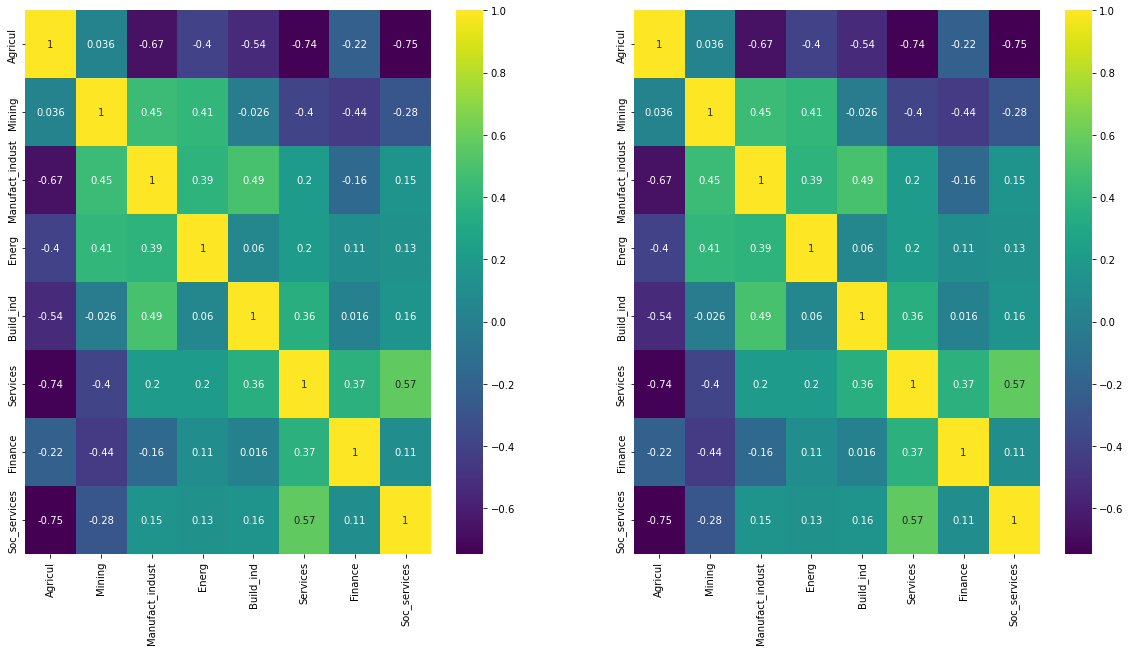

In [146]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
sns.heatmap(std_countries_data.corr(), ax=ax1, annot=True, cmap='viridis')
sns.heatmap(countries_data.corr(), ax=ax2, annot=True, cmap='viridis')
plt.show()

<AxesSubplot:>

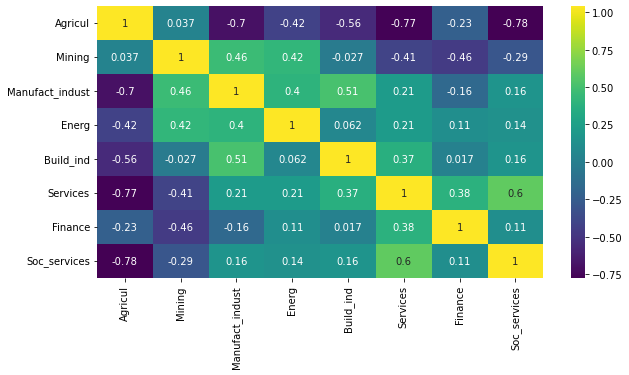

In [211]:
sns.heatmap(std_countries_data.cov(), annot=True, cmap='viridis')


## 3 Eigenvalues and Eigenvectors

Here we compute the eigen- values and vectors

In [147]:
eigen_vals, eigen_vect = np.linalg.eig(std_countries_data.cov())
print(f"Eigen values: \n{eigen_vals}\n"
"\n"
f"Eigen vectors: \n{eigen_vect}" )

Eigen values: 
[3.24611410e+00 2.12887094e+00 1.08844458e+00 8.82772670e-01
 1.83021502e-03 4.13743867e-01 2.32553279e-01 3.25670345e-01]

Eigen vectors: 
[[ 0.55742936  0.04856193  0.0152442  -0.09971546  0.79850528  0.19679979
   0.01756224 -0.00945623]
 [ 0.06622652 -0.63536406  0.16511982  0.0587939   0.0477742  -0.14108209
  -0.73383738  0.02239305]
 [-0.34599938 -0.4565332  -0.14055175 -0.14807077  0.3572455  -0.47388744
   0.42541638 -0.31146328]
 [-0.24143758 -0.3223398   0.6730433  -0.02618831  0.04651816  0.49000199
   0.32145305  0.19630049]
 [-0.33718653 -0.11905508 -0.5250223  -0.50338841  0.11098617  0.35249252
  -0.1330993   0.43450949]
 [-0.45462924  0.26130841  0.03764582  0.02002179  0.21401596  0.36003052
  -0.33265677 -0.66115562]
 [-0.15996555  0.40190133  0.47125975 -0.55324514  0.1248275  -0.44271527
  -0.20196612  0.17986488]
 [-0.40113265  0.19403057 -0.02469014  0.63569519  0.39574739 -0.1637824
  -0.08773167  0.4534195 ]]


## 4 PCA using Sklearn

In [220]:
from sklearn.decomposition import PCA

var_r = 0
n_steps = 0
while var_r < .75:
    print(f"Total explained variance ration is: {var_r + pca.explained_variance_ratio_[n_steps]} \nN.{n_steps + 1} component had explained {pca.explained_variance_ratio_[n_steps]}\n")
    var_r += pca.explained_variance_ratio_[n_steps]
    n_steps+= 1

pca = PCA(n_steps)
pca.fit(std_countries_data)

Total explained variance ration is: 0.39015794484595406 
N.1 component had explained 0.39015794484595406

Total explained variance ration is: 0.646031856018993 
N.2 component had explained 0.25587391117303904

Total explained variance ration is: 0.7768545220382104 
N.3 component had explained 0.13082266601921733



PCA(n_components=3)

In [235]:
PCA(.75).fit(std_countries_data)

PCA(n_components=0.75)

In [242]:
pca = PCA(.85)
pca.fit(std_countries_data)

PCA(n_components=0.85)

In [243]:
pca.fit_transform(std_countries_data)

array([[-1.77977097, -1.02033077,  0.28935222, -0.26811457],
       [-1.04911225, -2.15753531, -0.31188204, -0.74633418],
       [-1.16944194, -0.78695262,  0.01498123,  0.35309408],
       [-1.04882919,  0.28797846,  0.25822617, -0.1867587 ],
       [-0.03513399, -0.37895291,  0.84513477, -0.60546607],
       [-0.6962275 , -0.55921701, -1.83767545,  0.06270928],
       [-1.17330253,  1.11716583, -0.14934473,  0.38196425],
       [-1.92687477, -1.76887878, -0.02638068,  0.17366474],
       [-1.80322055, -0.01883739,  1.54720244, -0.8690401 ],
       [-1.15180917,  0.35970503,  0.72642197,  0.80127318],
       [-0.844588  , -0.78253136,  1.08877781, -0.33432646],
       [ 2.23867191, -0.82638428, -0.6918401 ,  0.48248158],
       [-1.10528024, -1.39078721, -0.25961753, -0.58712055],
       [ 0.76911986, -0.81669696, -0.95079703,  0.16554753],
       [ 0.0313049 , -0.38062782, -0.79587211,  2.81012056],
       [-1.21170405, -1.5024159 ,  0.28798552, -1.14437294],
       [-1.5021008 , -0.

In [244]:
pca.explained_variance_ratio_

array([0.39015794, 0.25587391, 0.13082267, 0.10610248])

In [252]:
pca.n_components

0.85

In [260]:
pca.__dict__

{'n_components': 0.85,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 'feature_names_in_': array(['Agricul', 'Mining', 'Manufact_indust', 'Energ', 'Build_ind',
        'Services', 'Finance', 'Soc_services'], dtype=object),
 'n_features_in_': 8,
 '_fit_svd_solver': 'full',
 'mean_': array([ 1.45183011e-16,  2.34854871e-16,  2.47665136e-16, -3.03176287e-16,
         8.36937357e-16,  1.53723188e-16,  3.41607085e-17, -1.87883896e-16]),
 'noise_variance_': 0.24344942654895854,
 'n_samples_': 26,
 'n_features_': 8,
 'components_': array([[ 0.55742936,  0.06622652, -0.34599938, -0.24143758, -0.33718653,
         -0.45462924, -0.15996555, -0.40113265],
        [-0.04856193,  0.63536406,  0.4565332 ,  0.3223398 ,  0.11905508,
         -0.26130841, -0.40190133, -0.19403057],
        [ 0.0152442 ,  0.16511982, -0.14055175,  0.6730433 , -0.5250223 ,
          0.03764582,  0.47125975, -0.02469014],
        [ 0.09971546, -0.058

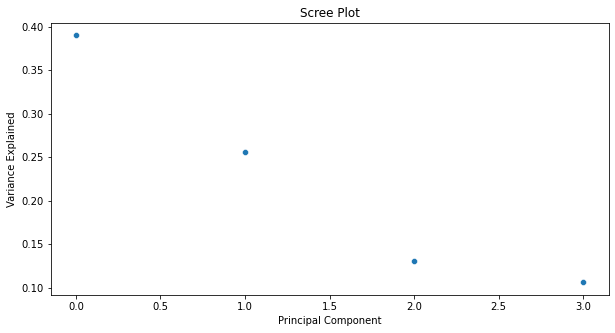

In [262]:
sns.scatterplot(y = pca.explained_variance_ratio_, x = [i for i in range(pca.n_components_)])
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [265]:
pca_std_countries = pd.DataFrame(pca.fit_transform(std_countries_data), columns=[f"pc_{i+1}" for i in range(pca.n_components_)])

pca_std_countries

,pc_1,pc_2,pc_3,pc_4
0,-1.779771,-1.020331,0.289352,-0.268115
1,-1.049112,-2.157535,-0.311882,-0.746334
2,-1.169442,-0.786953,0.014981,0.353094
3,-1.048829,0.287978,0.258226,-0.186759
4,-0.035134,-0.378953,0.845135,-0.605466
5,-0.696228,-0.559217,-1.837675,0.062709
6,-1.173303,1.117166,-0.149345,0.381964
7,-1.926875,-1.768879,-0.026381,0.173665
8,-1.803221,-0.018837,1.547202,-0.869040
9,-1.151809,0.359705,0.726422,0.801273


In [289]:
np.dot(std_countries_data, eigen_vect)[:, :4]

array([[-1.77977097,  1.02033077,  0.28935222,  0.26811457],
       [-1.04911225,  2.15753531, -0.31188204,  0.74633418],
       [-1.16944194,  0.78695262,  0.01498123, -0.35309408],
       [-1.04882919, -0.28797846,  0.25822617,  0.1867587 ],
       [-0.03513399,  0.37895291,  0.84513477,  0.60546607],
       [-0.6962275 ,  0.55921701, -1.83767545, -0.06270928],
       [-1.17330253, -1.11716583, -0.14934473, -0.38196425],
       [-1.92687477,  1.76887878, -0.02638068, -0.17366474],
       [-1.80322055,  0.01883739,  1.54720244,  0.8690401 ],
       [-1.15180917, -0.35970503,  0.72642197, -0.80127318],
       [-0.844588  ,  0.78253136,  1.08877781,  0.33432646],
       [ 2.23867191,  0.82638428, -0.6918401 , -0.48248158],
       [-1.10528024,  1.39078721, -0.25961753,  0.58712055],
       [ 0.76911986,  0.81669696, -0.95079703, -0.16554753],
       [ 0.0313049 ,  0.38062782, -0.79587211, -2.81012056],
       [-1.21170405,  1.5024159 ,  0.28798552,  1.14437294],
       [-1.5021008 ,  0.

In [290]:
pd.concat([pca_std_countries, std_countries_data], axis=1)

,pc_1,pc_2,pc_3,pc_4,Agricul,Mining,Manufact_indust,Energ,Build_ind,Services,Finance,Soc_services
0,-1.779771,-1.020331,0.289352,-0.268115,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082
1,-1.049112,-2.157535,-0.311882,-0.746334,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288
2,-1.169442,-0.786953,0.014981,0.353094,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792
3,-1.048829,0.287978,0.258226,-0.186759,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996
4,-0.035134,-0.378953,0.845135,-0.605466,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012
5,-0.696228,-0.559217,-1.837675,0.062709,-0.211928,-0.687386,0.086196,-1.105126,1.136949,1.146198,-0.872073,0.011486
6,-1.173303,1.117166,-0.149345,0.381964,-0.749821,1.940856,0.551875,-0.291920,0.641173,1.235356,0.218018,-0.122904
7,-1.926875,-1.768879,-0.026381,0.173665,-0.841656,-1.213035,-0.655981,0.250217,1.074977,1.123908,1.017419,1.265795
8,-1.803221,-0.018837,1.547202,-0.869040,-1.077805,0.153651,0.464560,1.334492,-0.784185,0.878723,0.617719,1.235930
9,-1.151809,0.359705,0.726422,0.801273,-0.421837,-0.161738,0.464560,1.334492,0.517228,0.856434,0.327027,-0.481278


<AxesSubplot:>

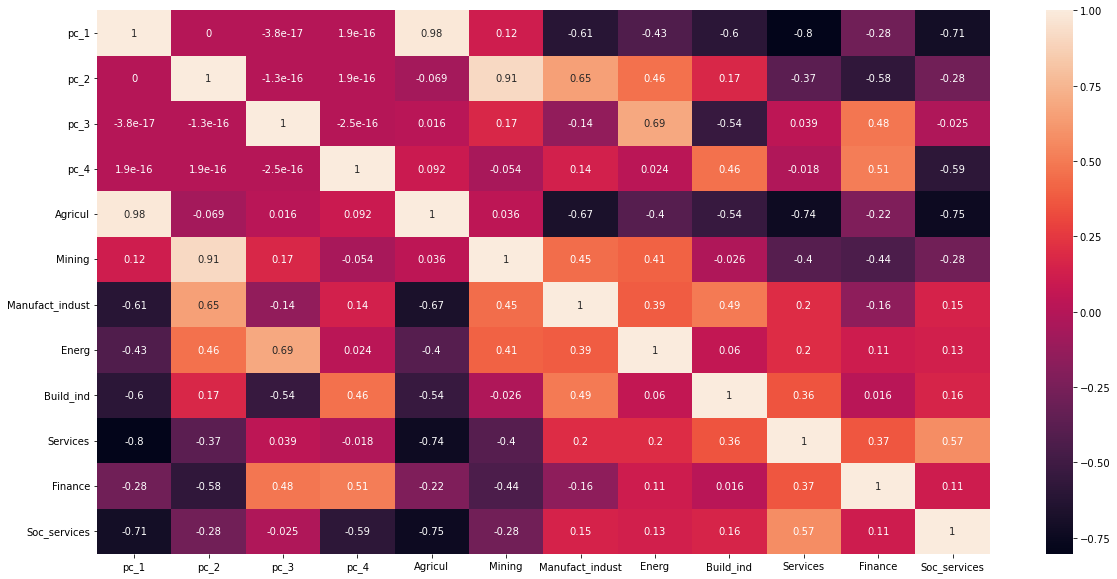

In [291]:
plt.subplots(1,1, figsize=(20, 10))
sns.heatmap(pd.concat([pca_std_countries, std_countries_data], axis=1).corr(), annot=True)

## 7 Calculate the correlation

In [213]:
std_countries_data.columns

Index(['Agricul', 'Mining', 'Manufact_indust', 'Energ', 'Build_ind',
       'Services', 'Finance', 'Soc_services'],
      dtype='object')

## 8 Communalities

In [324]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

reg = model.fit(std_countries_data[['Finance']], pca_std_countries)
reg.score(std_countries_data[['Finance']], pca_std_countries)

0.2256868267813013

In [325]:
pca_std_countries

,pc_1,pc_2,pc_3,pc_4
0,-1.779771,-1.020331,0.289352,-0.268115
1,-1.049112,-2.157535,-0.311882,-0.746334
2,-1.169442,-0.786953,0.014981,0.353094
3,-1.048829,0.287978,0.258226,-0.186759
4,-0.035134,-0.378953,0.845135,-0.605466
5,-0.696228,-0.559217,-1.837675,0.062709
6,-1.173303,1.117166,-0.149345,0.381964
7,-1.926875,-1.768879,-0.026381,0.173665
8,-1.803221,-0.018837,1.547202,-0.869040
9,-1.151809,0.359705,0.726422,0.801273


In [315]:
std_countries_data

,Agricul,Mining,Manufact_indust,Energ,Build_ind,Services,Finance,Soc_services
0,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082
1,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288
2,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792
3,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996
4,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012
5,-0.211928,-0.687386,0.086196,-1.105126,1.136949,1.146198,-0.872073,0.011486
6,-0.749821,1.940856,0.551875,-0.291920,0.641173,1.235356,0.218018,-0.122904
7,-0.841656,-1.213035,-0.655981,0.250217,1.074977,1.123908,1.017419,1.265795
8,-1.077805,0.153651,0.464560,1.334492,-0.784185,0.878723,0.617719,1.235930
9,-0.421837,-0.161738,0.464560,1.334492,0.517228,0.856434,0.327027,-0.481278


In [318]:
pca_std_countries

,pc_1,pc_2,pc_3,pc_4
0,-1.779771,-1.020331,0.289352,-0.268115
1,-1.049112,-2.157535,-0.311882,-0.746334
2,-1.169442,-0.786953,0.014981,0.353094
3,-1.048829,0.287978,0.258226,-0.186759
4,-0.035134,-0.378953,0.845135,-0.605466
5,-0.696228,-0.559217,-1.837675,0.062709
6,-1.173303,1.117166,-0.149345,0.381964
7,-1.926875,-1.768879,-0.026381,0.173665
8,-1.803221,-0.018837,1.547202,-0.869040
9,-1.151809,0.359705,0.726422,0.801273


In [313]:
def compute_communalities(y, X):
    
    model = LinearRegression()
    reg = model.fit(y, X)
    r_2 = reg.score(y, X)

    return r_2


In [317]:
print(compute_communalities(y=std_countries_data[['Mining']], X=pca_std_countries))

0.21787580034980203


In [218]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 7,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}